In [1]:
!pip install scanpy -q
!pip install leidenalg -q
!pip install matplotlib -q
!pip install numpy==1.22.4
!pip install scikit-misc -q
!pip install spasrl -q

In [2]:
!pip install scanpy

In [3]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

/home/aryan/anaconda3/envs/spasrl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path = "./Data/"

In [5]:
"""
NOTE:
In order to read using read_visium data, JSON and the tissue position files should be maintained in spatial folder,
image files outside the spatial folder.
read_visium functions takes care of creating ann data object with all the information.

"""
adata = sc.read_visium(path, count_file = "151507_filtered_feature_bc_matrix.h5", source_image_path = path)
adata.var_names_make_unique()


In [6]:
print (adata)

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


In [7]:
print (adata.obsm['spatial'])

[[3276 2514]
 [9178 8520]
 [5133 2878]
 ...
 [4218 9703]
 [4017 7906]
 [5683 3359]]


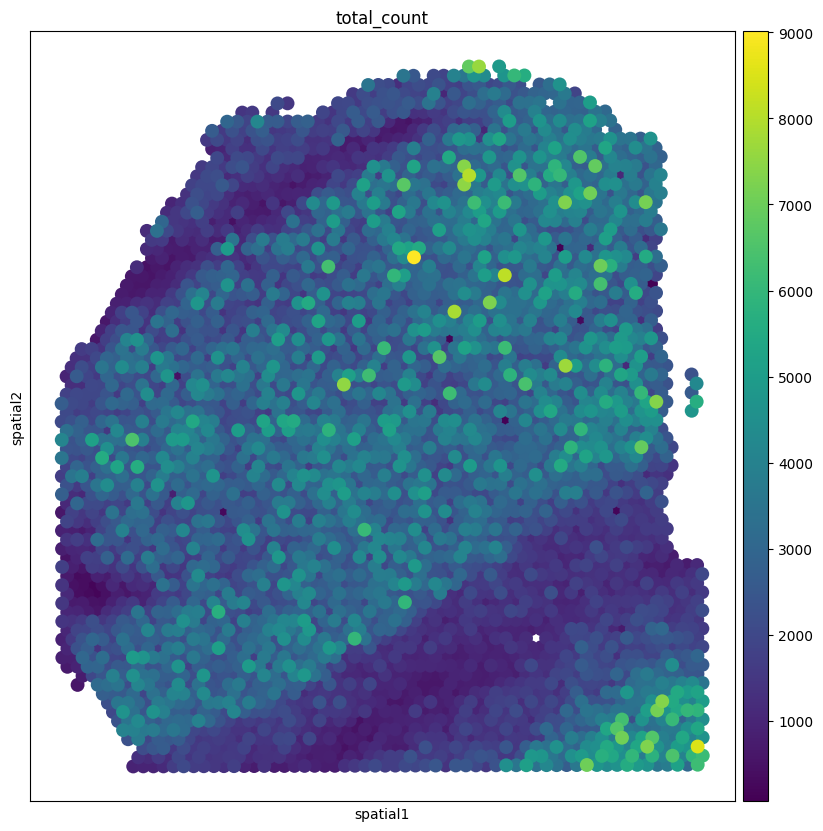

In [8]:
plt.rcParams["figure.figsize"] = (10, 10)

adata.obs['total_count'] = adata.X.sum(axis = 1)
#sc.pl.spatial(adata, img_key ="hires",library_id = "151673", size=1.2) #colorbar_loc = None, color="clusters"
sc.pl.embedding(adata, basis = "spatial", color = "total_count", size = 400)  #s = 80, cmap = 'Reds'

In [9]:
print (adata[adata.obs['in_tissue'] == 1])

View of AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'total_count'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


In [10]:
import SpaSRL as sp

In [11]:
sc.pp.highly_variable_genes(adata, n_top_genes=12000,flavor='seurat_v3',inplace=True)
sc.pp.log1p(adata)

In [12]:
adata=adata[:,adata.var['highly_variable']]

In [13]:
adata

View of AnnData object with n_obs × n_vars = 4226 × 12000
    obs: 'in_tissue', 'array_row', 'array_col', 'total_count'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'

In [14]:
sp.select_landmarks(adata, n_landmarks=1000, random_state=0)

100%|██████████| 2000/2000 [03:43<00:00,  8.95it/s, seleted landmarks: 299]


In [15]:
adata

AnnData object with n_obs × n_vars = 4226 × 12000
    obs: 'in_tissue', 'array_row', 'array_col', 'total_count', 'is_landmark'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'select_landmarks'
    obsm: 'spatial'

In [16]:
sp.run_SRL(adata,Lambda=0.1,n_neighbors=50)

 20%|█▉        | 98/500 [00:53<03:39,  1.83it/s, relChg: 2.179e-05, recErr: 9.965e-06, converged!]


In [17]:
adata

AnnData object with n_obs × n_vars = 4226 × 12000
    obs: 'in_tissue', 'array_row', 'array_col', 'total_count', 'is_landmark'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'select_landmarks', 'representation'
    obsm: 'spatial'
    obsp: 'representation'

In [19]:
sc.tl.pca(adata,n_comps=250)

In [20]:
sc.pp.pca(adata,n_comps=250)

In [31]:
sc.tl.leiden(adata, resolution=2, neighbors_key='representation')

In [32]:
sc.tl.umap(adata, neighbors_key='representation')

In [33]:
adata

AnnData object with n_obs × n_vars = 4226 × 12000
    obs: 'in_tissue', 'array_row', 'array_col', 'total_count', 'is_landmark', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'select_landmarks', 'representation', 'pca', 'leiden', 'umap', 'leiden_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'representation'

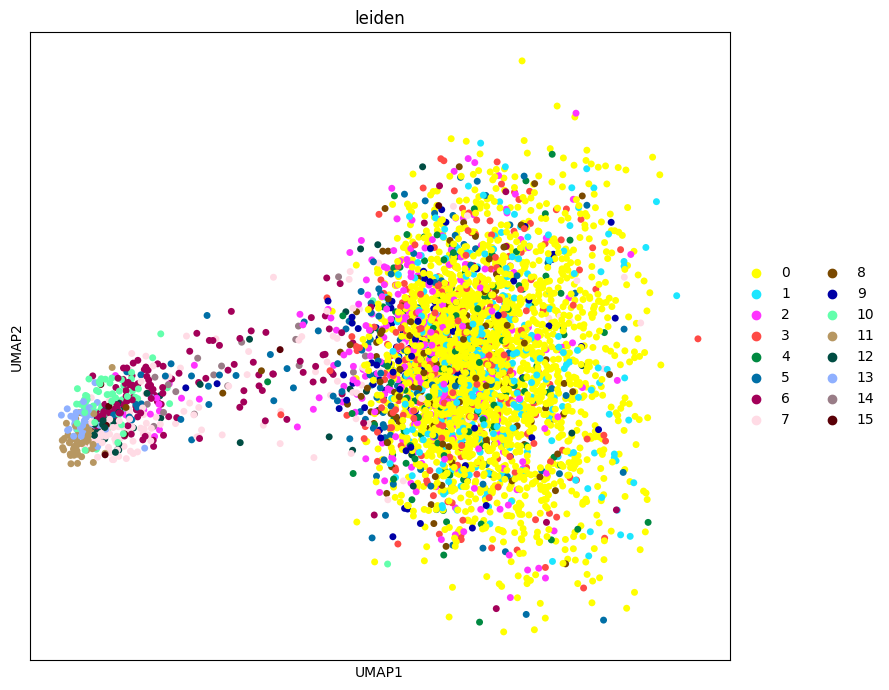

In [34]:
fig, axs = plt.subplots(figsize=(9, 7))

sc.pl.umap(
    adata,
    color="leiden",
    size=100,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    show=False,
    ax=axs,
)

plt.tight_layout()

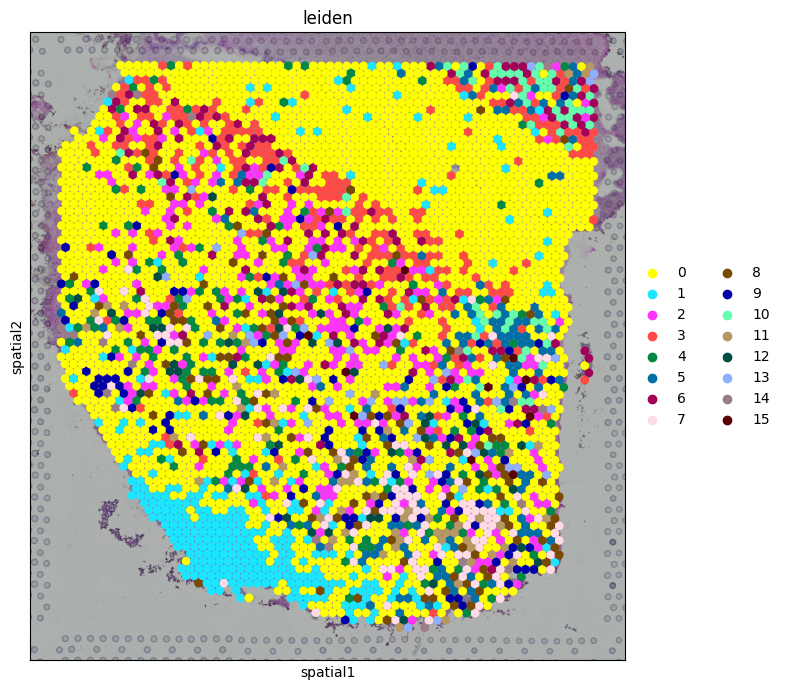

In [35]:
fig, axs = plt.subplots(figsize=(9, 7))

sc.pl.spatial(
    adata,
    img_key="hires",
    color="leiden",
    size=1.5,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    show=False,
    ax=axs,
)

plt.tight_layout()